# Introduction


This notebook introduces the OpenKMI package. OpenKMI serves as a wrapper around the WFS service that KMI offers to download both synoptic measurements and data from the automatic weather stations.

This notebook focuses on the synoptic observations from KMI.

See the following links for the metadata of the service:

* https://opendata.meteo.be/geonetwork/srv/eng/catalog.search;jsessionid=A7FEA3AF21132DE8B1DA8A2CD1746597#/metadata/RMI_DATASET_SYNOP
* https://opendata.meteo.be/documentation/?dataset=synop


# Initialize the package

First load the modules we will use

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd   
from openkmi.point_obs import Synop

Then initialize the package

In [2]:
kmi = Synop()

# Inspect the available stations

You can use OpenKMI to get an overview of all stations where you can collect the data for

In [3]:
df_stations = kmi.get_stations()
print(f'There are {df_stations.shape[0]} stations available')

There are 22 stations available


In [4]:
df_stations

,code,the_geom,altitude,name,date_begin,date_end
0,6459,POINT (50.581913 4.689214),159.2,ERNAGE,2002-05-22T00:00:00,NaN
1,6451,POINT (50.896391 4.526765),58.0,ZAVENTEM/MELSBROEK,1952-01-01T00:00:00,NaN
2,6449,POINT (50.454432 4.442053),192.0,GOSSELIES,1962-01-01T00:00:00,NaN
3,6450,POINT (51.191399 4.451755),14.0,DEURNE,1952-01-01T00:00:00,NaN
4,6464,POINT (51.221395 5.027247),21.5,RETIE,2002-02-14T01:00:00,NaN
5,6472,POINT (50.193663 5.255236),295.3,HUMAIN,2002-04-01T00:00:00,NaN
6,6494,POINT (50.510779 6.073438),673.2,MONT RIGI,2001-04-12T00:00:00,NaN
7,6484,POINT (49.620358 5.587229),323.9,BUZENOL,2003-04-03T06:00:00,NaN
8,6490,POINT (50.478615 5.909864),482.0,SPA (AERODROME),1952-01-01T00:00:00,NaN
9,6476,POINT (50.038875 5.403753),557.0,SAINT-HUBERT,1952-01-01T00:00:00,NaN


# Inspect the available parameters

Let's see what data is in the wfs and what data we can use to filter upon.

In [5]:
kmi.get_parameters()

{'code': 'int',
 'timestamp': 'dateTime',
 'precip_quantity': 'decimal',
 'precip_range': 'decimal',
 'temp': 'decimal',
 'temp_min': 'decimal',
 'temp_max': 'decimal',
 'temp_grass_min': 'decimal',
 'wind_speed': 'decimal',
 'wind_speed_unit': 'int',
 'wind_direction': 'decimal',
 'wind_peak_speed': 'decimal',
 'humidity_relative': 'decimal',
 'weather_current': 'int',
 'pressure': 'decimal',
 'pressure_station_level': 'decimal',
 'sun_duration_24hours': 'decimal',
 'short_wave_from_sky_24hours': 'decimal',
 'cloudiness': 'decimal'}

# Download data

For downloading the data you need to provide at least the station code. Optional parameters are:
* **start_date and end_date**: These are used to limit the requested data
* **parameter_list**: List of parameters to download

## Example: Simple request to fetch wind speed

To get the wind speed for the station at Stabroek from 2021 - now you can use the following command:

In [6]:
df_r = kmi.get_data('6438', start_date='2021-01-01T00:00:00', parameter_list=['wind_speed'])

In [7]:
df_r.head()

,wind_speed
timestamp,
2021-01-01 00:00:00+00:00,1.000
2021-01-01 01:00:00+00:00,0.000
2021-01-01 02:00:00+00:00,1.000
2021-01-01 03:00:00+00:00,1.000
2021-01-01 04:00:00+00:00,1.388


<AxesSubplot:xlabel='timestamp'>

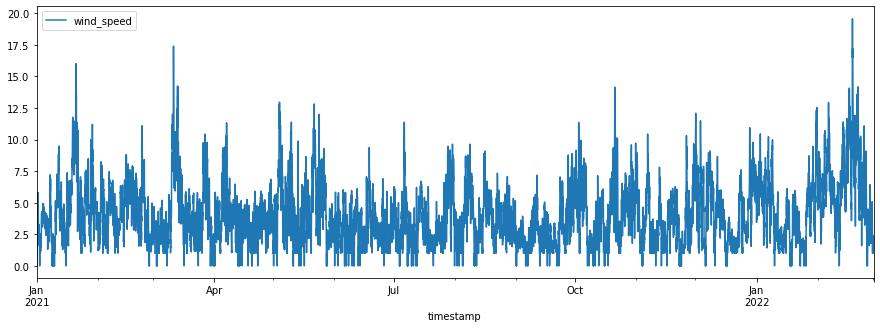

In [8]:
fix, ax = plt.subplots(figsize=(15,5))
df_r.plot(ax=ax)

## Example with custom filter: Precipitation

Precipitation is not available on an hourly timescale. According to the metadata are 2 different precipitation ranges available:

* Value at 0600UT: sum of precipitation between 1750-0550UT (12h)
* Value at 1200UT: sum of precipitation between 0550-1150UT (6h)
* Value at 1800UT: sum of precipitation between 0550-1750UT (12h)
* Value at 0000UT: sum of precipitation between 1750-2350UT (6h)

We first request both the precipitation quanitity and the precipitation range for the station of Ukkel.

In [9]:
df_r = kmi.get_data('6447', start_date='2020-01-01T00:00:00', end_date= '2021-01-01T00:00:00', parameter_list=['precip_quantity', 'precip_range'])

In [10]:
print(f'The dataframe contains {df_r.shape[0]} datapoints')
df_r.head(10)

The dataframe contains 8783 datapoints


,precip_quantity,precip_range
timestamp,,
2020-01-01 00:00:00+00:00,0.0,1.0
2020-01-01 01:00:00+00:00,NaN,NaN
2020-01-01 02:00:00+00:00,NaN,NaN
2020-01-01 03:00:00+00:00,NaN,NaN
2020-01-01 04:00:00+00:00,NaN,NaN
2020-01-01 05:00:00+00:00,NaN,NaN
2020-01-01 06:00:00+00:00,0.0,2.0
2020-01-01 07:00:00+00:00,NaN,NaN
2020-01-01 08:00:00+00:00,NaN,NaN


You can see from the table above that a lot of Nan values are passed since there is only data every 6h. The datframe also contains a mix of data measured over a 6h period (precip_range=1) and over a 12h period (precip_range=2).

To get cumulative volumes we want to filter out only those measured over the 12h period. By doing that on the client side we limit the data transfer. This can be done by using a custom filter. The custom filter can be any valid OgcExpression.

In [11]:
from owslib.fes import PropertyIsEqualTo
custom_filt = PropertyIsEqualTo(propertyname='precip_range', literal='2')
df_r = kmi.get_data('6447', start_date='2020-01-01T00:00:00', end_date= '2021-01-01T00:00:00',
                    parameter_list=['precip_quantity', 'precip_range'], custom_filter=custom_filt)

In [12]:
print(f'The dataframe now only contains {df_r.shape[0]} datapoints')
df_r.head(10)

The dataframe now only contains 732 datapoints


,precip_quantity,precip_range
timestamp,,
2020-01-01 06:00:00+00:00,0.0,2
2020-01-01 18:00:00+00:00,0.0,2
2020-01-02 06:00:00+00:00,0.0,2
2020-01-02 18:00:00+00:00,0.1,2
2020-01-03 06:00:00+00:00,0.0,2
2020-01-03 18:00:00+00:00,4.1,2
2020-01-04 06:00:00+00:00,0.0,2
2020-01-04 18:00:00+00:00,0.0,2
2020-01-05 06:00:00+00:00,0.0,2


The dataframe now only contains data from measured over a 12h period.

Since it limits the number of datapoints we can quickly request the data for a large period.

In [13]:
df_r = kmi.get_data('6447', start_date='1950-01-01T00:00:00', end_date= '2022-01-01T00:00:00',
                    parameter_list=['precip_quantity'], custom_filter=custom_filt)

<AxesSubplot:xlabel='timestamp'>

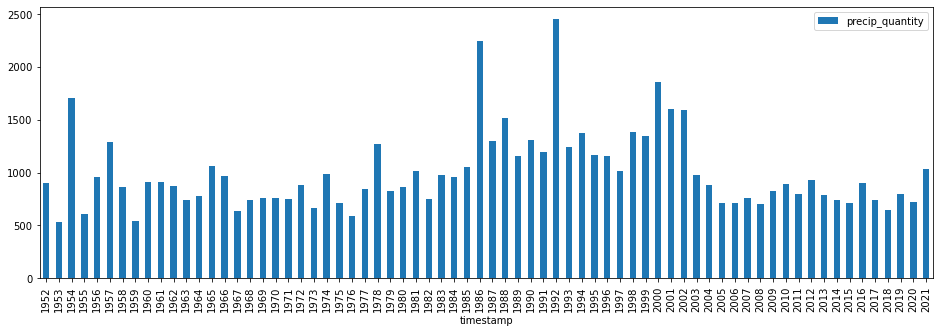

In [14]:
fig, ax = plt.subplots(figsize=(16,5))
df_r.groupby(df_r.index.year).sum().plot.bar(ax=ax)

Note that there seem to be some rather high and unrealistic values in the graph. Therefore we quickly check the number of datapoints for each year in the plot below.

<AxesSubplot:xlabel='timestamp'>

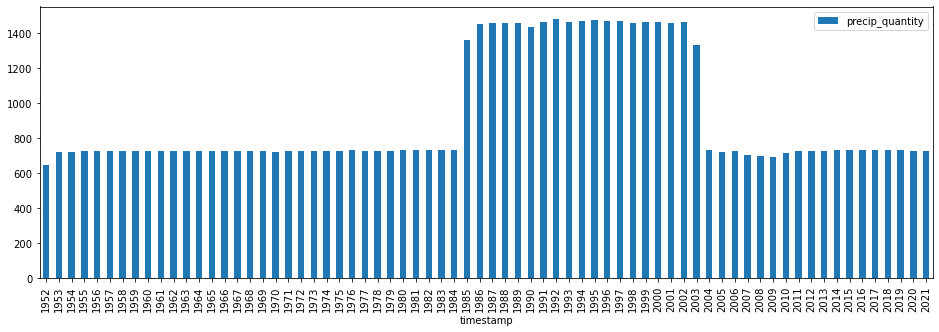

In [15]:
fig, ax = plt.subplots(figsize=(16,5))
df_r.groupby(df_r.index.year).count().plot.bar(ax=ax)

So it seems that for some years there are more synoptic measurements than we can expect based on the precipitation type. Note that we are not responsible in any way for the quality of the data downloaded using this package.

We can still filter out these data by only taking into account the datapoints at 6h and 18h

In [16]:
df_r = df_r[df_r.index.hour.isin([6,18])]

<AxesSubplot:xlabel='timestamp'>

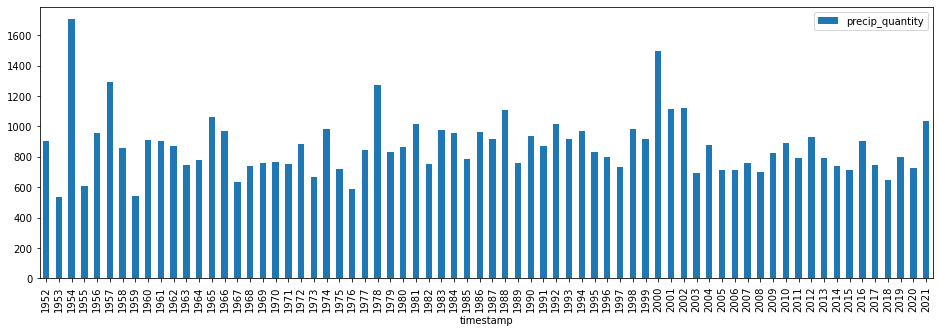

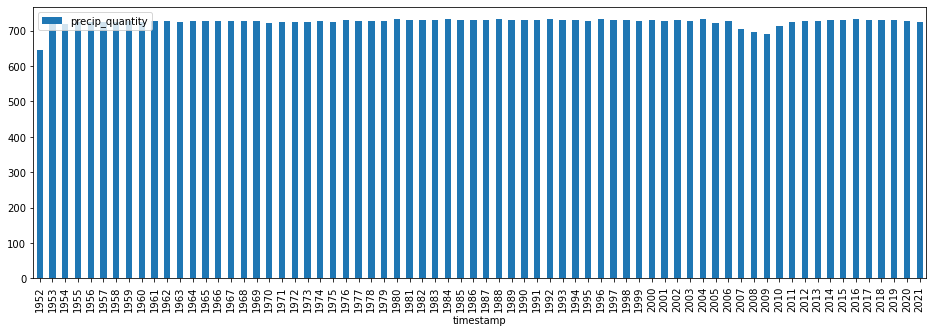

In [17]:
fig, ax = plt.subplots(figsize=(16,5))
df_r.groupby(df_r.index.year).sum().plot.bar(ax=ax)
fig, ax = plt.subplots(figsize=(16,5))
df_r.groupby(df_r.index.year).count().plot.bar(ax=ax)

Note that there are still points where the number of synoptic observations is lower than what we can expect.